# [Day 1-3] 프로젝트 설명서

---

| 아래의 링크를 통해 파일을 다운로드 받으세요.  
| https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

---

# 목표 
+ 다음 분기에 어떤 게임을 설계해야 할까

---

# 🕹️ Data Description
+ Name : 게임의 이름입니다.  
+ Platform : 게임이 지원되는 플랫폼의 이름입니다.  
+ Year : 게임이 출시된 연도입니다.  
+ Genre : 게임의 장르입니다.  
+ Publisher : 게임을 제작한 회사입니다.  
+ NA_Sales : 북미지역에서의 출고량입니다.  
+ EU_Sales : 유럽지역에서의 출고량입니다.  
+ JP_Sales : 일본지역에서의 출고량입니다.  
+ Other_Sales : 기타지역에서의 출고량입니다.  

---

# 참조  
+ Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization  
+ Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test  
+ Sprint 3 : DR, PCA, Clustering, GD  

---

# 반드시 들어가야 하는 내용.
+ 지역에 따라서 선호하는 게임 장르가 다를까
+ 연도별 게임의 트렌드가 있을까
+ 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함

# 라이브러리 임포트

In [ ]:
# 데이터 핸들링
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

In [ ]:
# data from github public repository
# 기존 데이터에 인덱스가 포함되어 있음으로, 인덱스 없이 불러오기. https://jkim83.tistory.com/169
df_origin = pd.read_csv("https://github.com/CJYjob/ds-section1-Project1-new-/blob/main/vgames2.csv?raw=true", index_col=0)

# 데이터 원본 보존
원본 = df_origin  
가공 = df

In [ ]:
# 데이터 원본 보존
df = df_origin.copy()

# Data Wrangling : 탐색

In [ ]:
df.shape

(16598, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [ ]:
df.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [ ]:
df.Publisher.unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [ ]:
df.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

# Data Wrangling : 문제 정의

+ 총 16598개의 관측치가 있으며, 
  + Year column에 271 개의 결측치,
  + Genre column에 50 개의 결측치
  + Publisher column에 58 개의 결측치  
  가 관찰됨.
> 결측치를 유추할 수 있는 관계가 없고, 결측치의 비율이 전체의 5% 미만이라면, 제거함.

+ 이산형 데이터인 year 네자리수가 아닌 방법으로 표현된 경우가 있으며, float형으로 설정되어 있음. 
  > 네자리수로 형태를 바꾼 후 int형으로 전환
+ 판매량이 object형이며 세가지 형태(420K 0.28M 0.01)로 표현 
  > 판매량 단위를 (개)로 통일 후, int형으로 전환
+ 구조적으로 Tidy하지 못한 데이터(	NA_Sales	EU_Sales	JP_Sales	Other_Sales) 
  > Location,Sales 칼럼으로 전환

In [ ]:
# NaN 데이터 개수 확인. 연도를 추측할 방법이 없음으로, drop 고려
year_NaN_count, genre_NaN_count, publisher_NaN_count = df.isna().sum()[2:5]

In [ ]:
# 결측치 비율 계산
ratio = (year_NaN_count+genre_NaN_count+publisher_NaN_count) / df.shape[0] * 100
print(ratio)

2.2834076394746354


In [ ]:
# 결측치가 모두 다른 관측치에서 발견된다 가정해도, 
# 전체 중 2.28%로 5% 미만, 결측치로 제거하여도 큰 영향이 없음. -> 결측치가 있는 관측치(행) 제거 수행
df = df.dropna(axis=0)
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
# drop 후 인덱스 재정렬
df = df.reset_index(drop=True)

In [ ]:
# Year의 숫자가 23 미만인 경우 2000을 더해줘 연도를 수정
for i, x in enumerate(df.query("Year < 23")["Year"].index) :
  df.iloc[x, 2] = df.iloc[x, 2] + 2000

In [ ]:
# Year의 숫자가 23 이상, 1000 미만인 경우 1900을 더해줘 연도를 수정
for i, x in enumerate(df.query("23 <= Year < 1000").index) :
  df.iloc[x, 2] = df.iloc[x, 2] + 1900

In [ ]:
# df.year 의 데이터 타입 전환
df = df.astype({'Year':'int'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# tidy data로 전환
df = df.melt(id_vars=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df = df.rename(columns = {'variable' :'Location', 'value':'Sales'})    
df["Location"] = df["Location"].str.replace("_Sales", "")

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,Location,Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,NA,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,NA,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,NA,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,NA,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,NA,0.12
...,...,...,...,...,...,...,...
64959,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,Other,0.01
64960,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,Other,0
64961,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,Other,0.13
64962,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,Other,0.03


In [ ]:
# 판매량이 세가지 형태로 표현. x.xx, x.xxM, xxxK
# Sales에 대해서 세가지 형태(문자 미포함, M 포함, K 포함)로만 칼럼이 이루어 지는지 확인
df.shape[0] == df[~df.Sales.str.contains("M")&~df.Sales.str.contains("K")]["Sales"].count() + df[df.Sales.str.contains("M")]["Sales"].count() + df[df.Sales.str.contains("K")]["Sales"].count()

True

In [ ]:
# scale을 표시하기 위한 column 추가
df["Scale"] = np.repeat(0, len(df))

In [ ]:
for i in df[df["Sales"].str.contains("K")].index:
  df.loc[i, "Scale"] = 1000
for i in df[~df["Sales"].str.contains("K")].index:
  df.loc[i, "Scale"] = 1000000

In [ ]:
# 판매량을 수치형으로 표현하기 위해, "M","K" 제거
df["Sales"] = df["Sales"].str.replace("M", "")
df["Sales"] = df["Sales"].str.replace("K", "")

In [ ]:
# 판매량 계산을 위해 float형으로 전환
df["Sales"] = df["Sales"].astype(float)

In [ ]:
# 판매량 계산 후 업데이트
df["Sales"] = df["Sales"] * df["Scale"]

In [ ]:
# 판매량을 int형으로 전환
df["Sales"] = df["Sales"].astype(int)

In [ ]:
# 계산을 마친 Scale 칼럼 버리기
df = df.iloc[:,:-1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       64964 non-null  object
 1   Platform   64964 non-null  object
 2   Year       64964 non-null  int64 
 3   Genre      64964 non-null  object
 4   Publisher  64964 non-null  object
 5   Location   64964 non-null  object
 6   Sales      64964 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.5+ MB


In [ ]:
df

,Name,Platform,Year,Genre,Publisher,Location,Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,NA,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,NA,170000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,NA,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,NA,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,NA,120000
...,...,...,...,...,...,...,...
64959,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,Other,10000
64960,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,Other,0
64961,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,Other,130000
64962,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,Other,30000


# 데이터 시각화


# 지역에 따라 선호하는 게임 장르 차이 확인

In [ ]:
loc_vis = pd.DataFrame()

In [ ]:
loc_vis["NA"] = df.query("Location == 'NA'").groupby("Genre")['Sales'].sum()
loc_vis["EU"] = df.query("Location == 'EU'").groupby("Genre")['Sales'].sum()
loc_vis["JP"] = df.query("Location == 'JP'").groupby("Genre")['Sales'].sum()
loc_vis["Other"] = df.query("Location == 'Other'").groupby("Genre")['Sales'].sum()

In [ ]:
# 전체에 대한 비율로 정규화
loc_vis["NA"] = loc_vis["NA"].apply(lambda x: x / loc_vis['NA'].sum())
loc_vis["EU"] = loc_vis["EU"].apply(lambda x: x / loc_vis['EU'].sum())
loc_vis["JP"] = loc_vis["JP"].apply(lambda x: x / loc_vis['JP'].sum())
loc_vis["Other"] = loc_vis["Other"].apply(lambda x: x / loc_vis['Other'].sum())

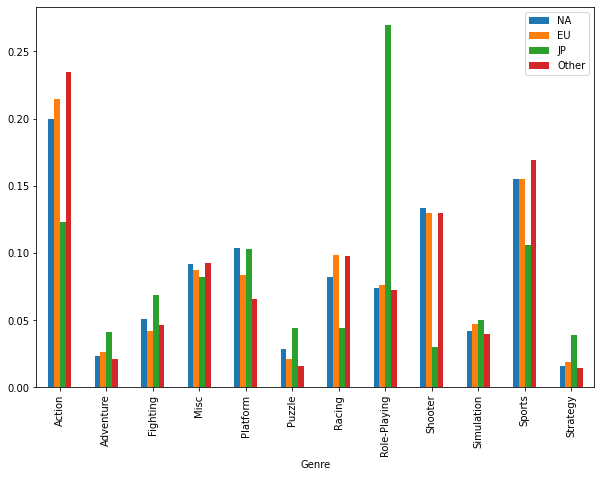

In [ ]:
# 일본의 경우 롤 플레잉 게임이 도드라지는 것을 확인할 수 있다.
loc_vis.plot(kind="bar", figsize=(10,7))

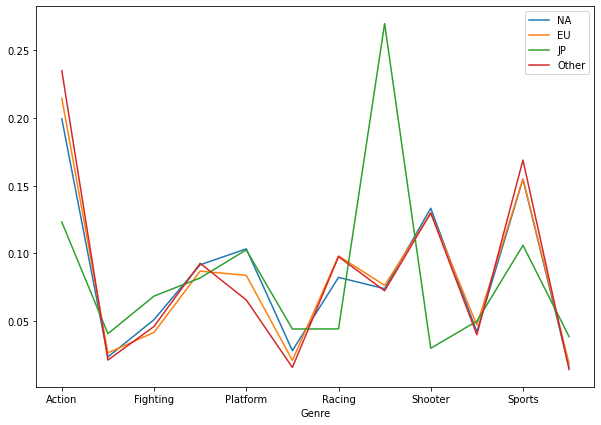

In [ ]:
loc_vis.plot(kind="line", figsize=(10,7))

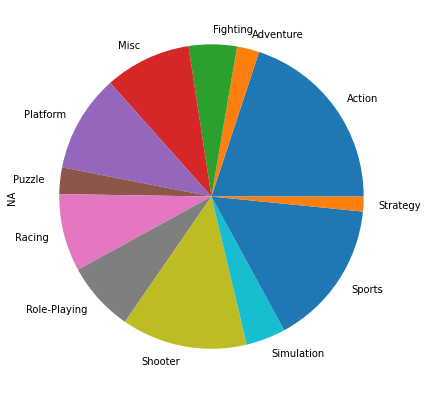

In [ ]:
loc_vis["NA"].plot(kind="pie", figsize=(10,7))

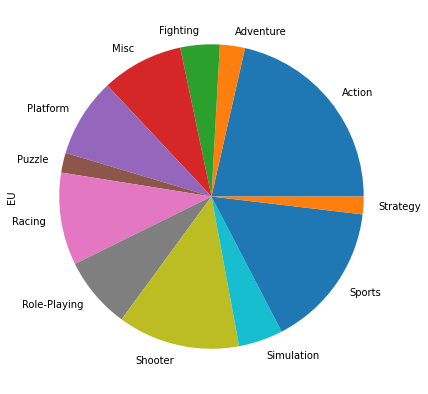

In [ ]:
loc_vis["EU"].plot(kind="pie", figsize=(10,7))

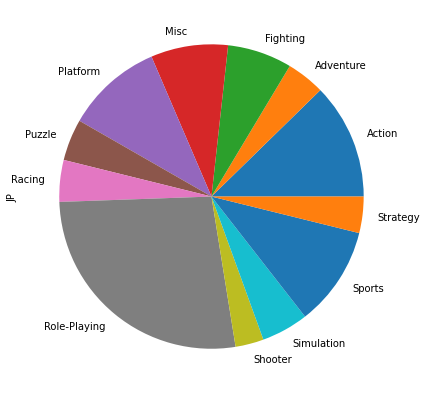

In [ ]:
loc_vis["JP"].plot(kind="pie", figsize=(10,7))

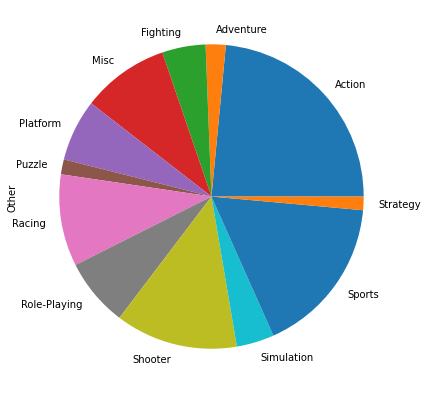

In [ ]:
loc_vis["Other"].plot(kind="pie", figsize=(10,7))

# 연도별 게임 트랜드 시각화

In [ ]:
def trand_year(df, title) :
  result = pd.DataFrame()
  # 매년 판매량을 장르별로 종합
  for i in df["Year"].unique() :
    result[i] = df[df.Year == i].groupby("Genre").sum()["Sales"]
  result = result.fillna(0)
  result = result.T
  result = pd.melt(result.reset_index(), id_vars=["index"])
  result.columns = ['Year', "Genre", "value"]
  result.plot(kind = "scatter", x="Year", y="Genre", title=title, s=result["value"]/100000,figsize=(10,7), c="value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

## 글로벌 트랜드

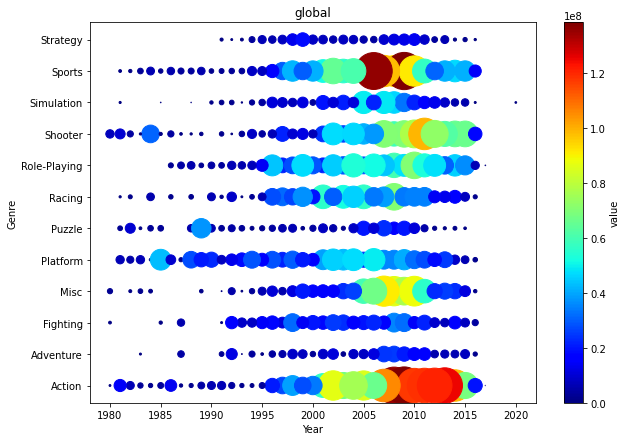

In [ ]:
trand_year(df, "global")

## 나라 별 트랜드

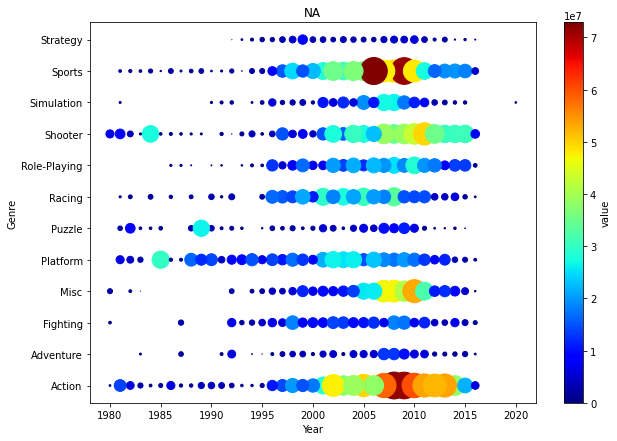

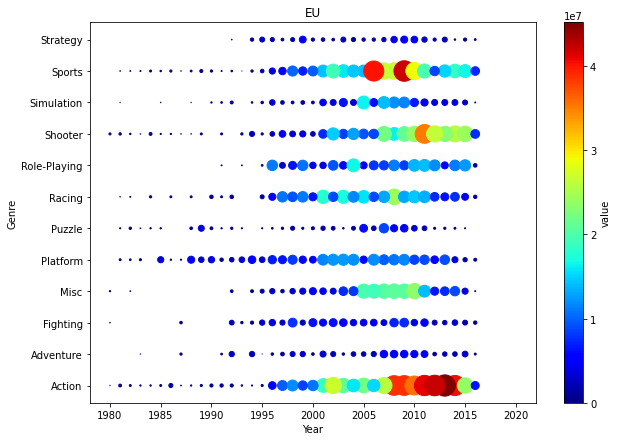

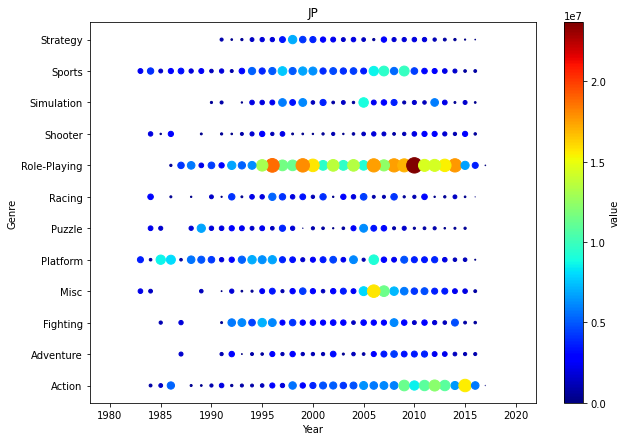

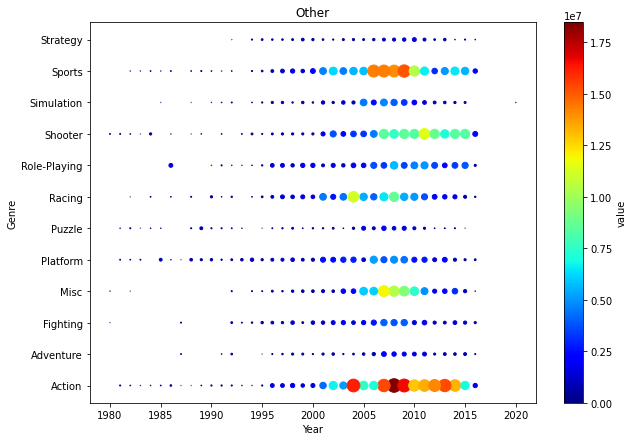

In [ ]:
for loc in df["Location"].unique() :
  trand_year(df.query("Location == @loc"), loc)

## 플랫폼 트랜드

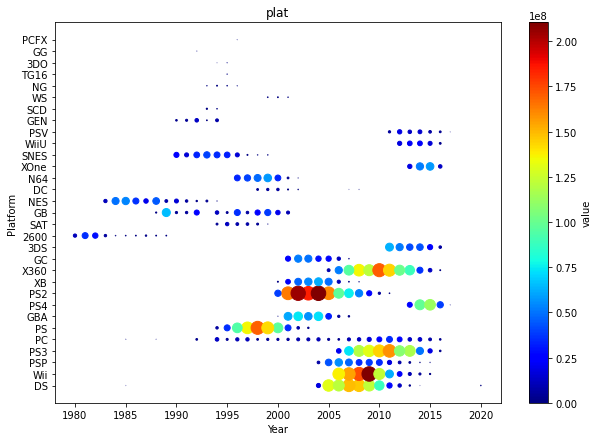

In [ ]:
result = pd.DataFrame()
result.index = df["Platform"].unique()
for i in df["Year"].unique() :
  result[i] = df[df.Year == i].groupby("Platform").sum()["Sales"]
result = result.fillna(0)
result = result.T
result = pd.melt(result.reset_index(), id_vars=["index"])
result.columns = ['Year', "Platform", "value"]
result.plot(kind = "scatter", x="Year", y="Platform", title='plat', s=result["value"]/1000000,figsize=(10,7), c="value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

# 플랫폼 별 트랜드는

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


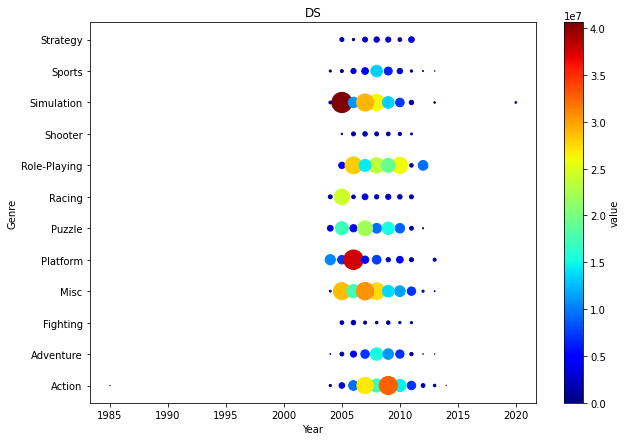

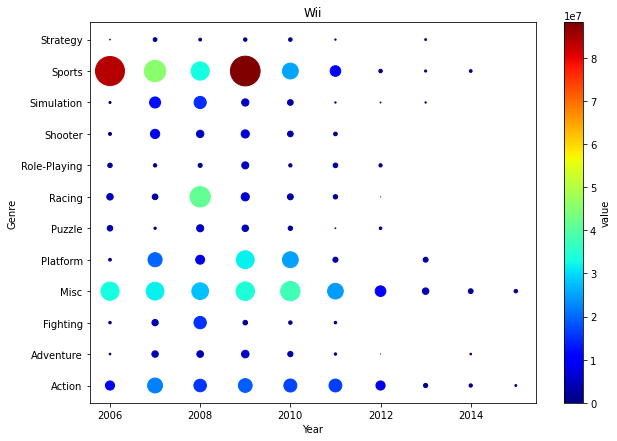

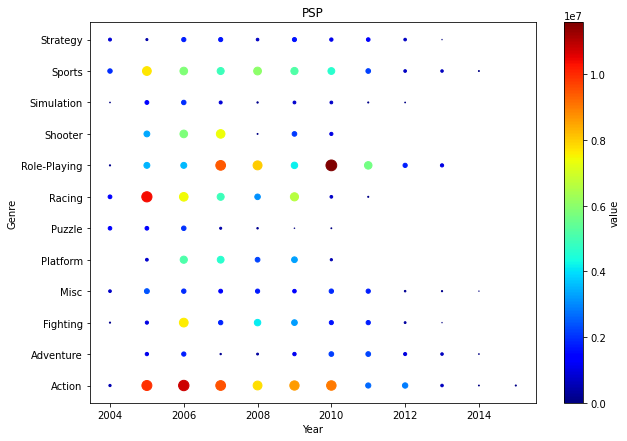

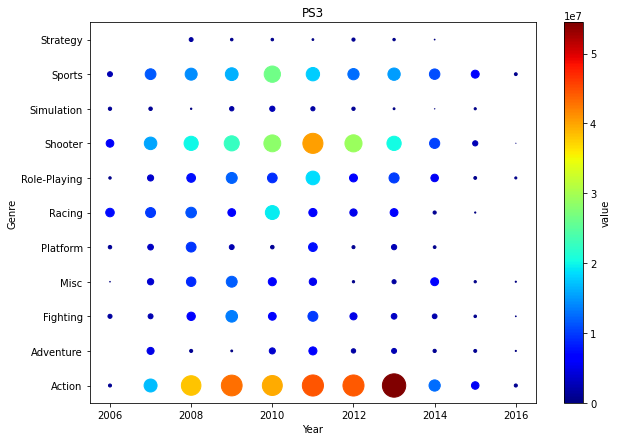

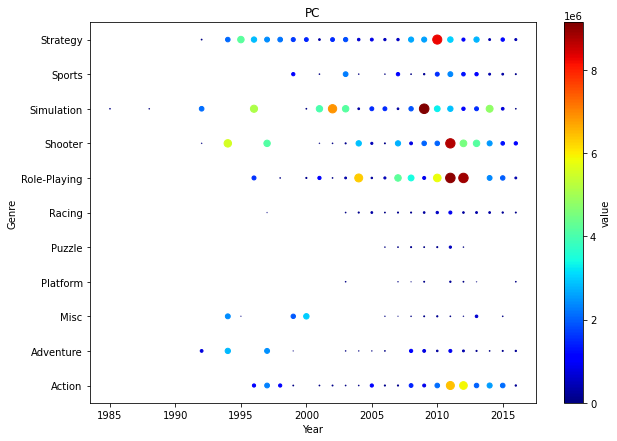

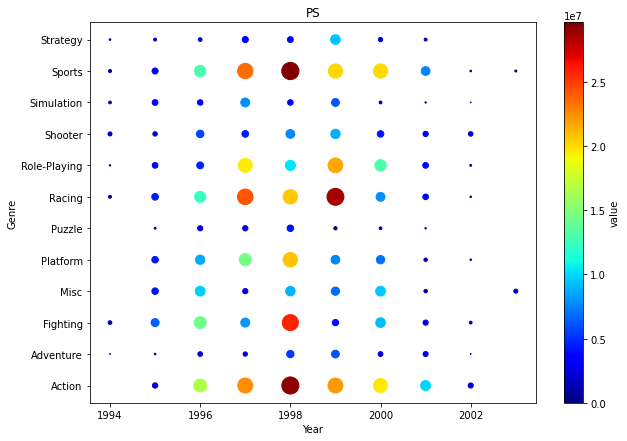

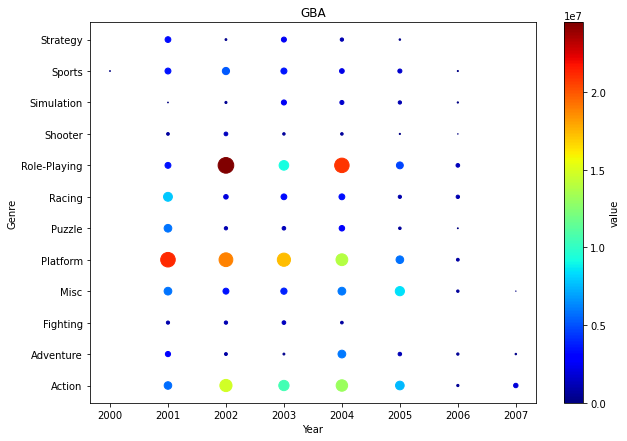

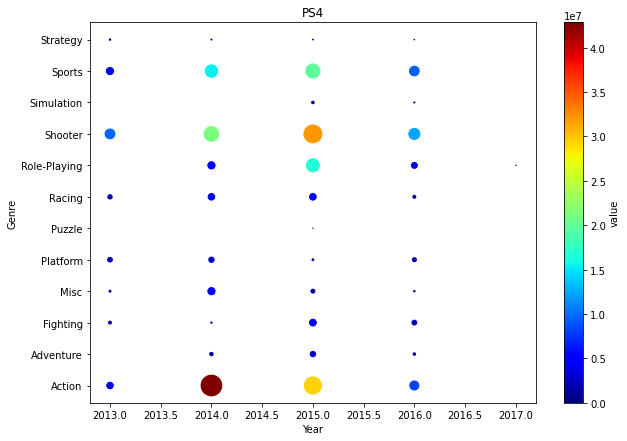

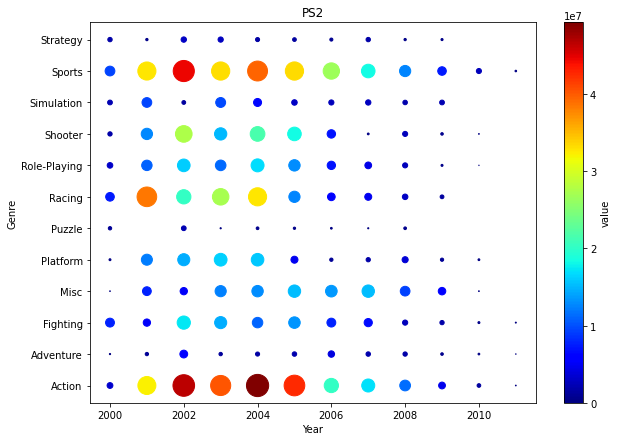

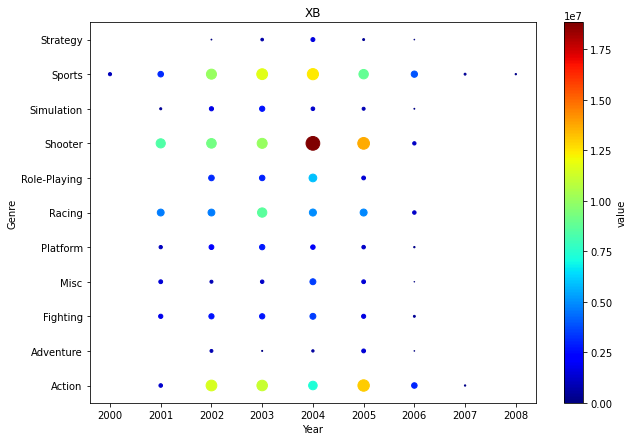

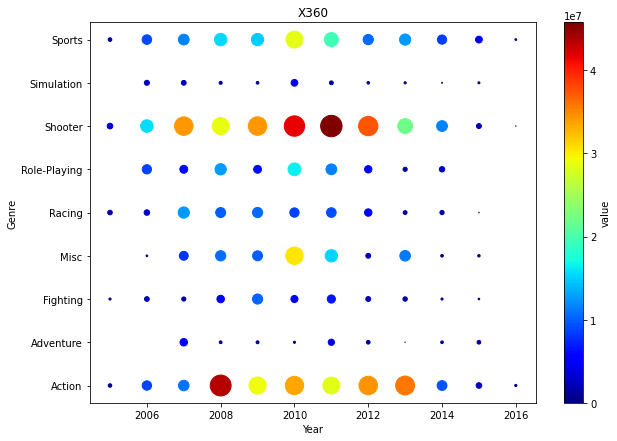

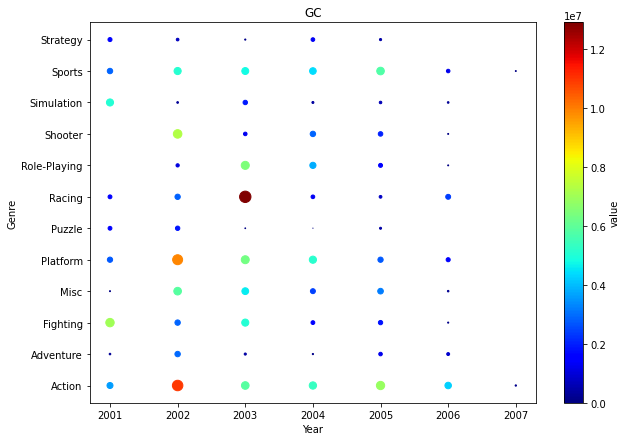

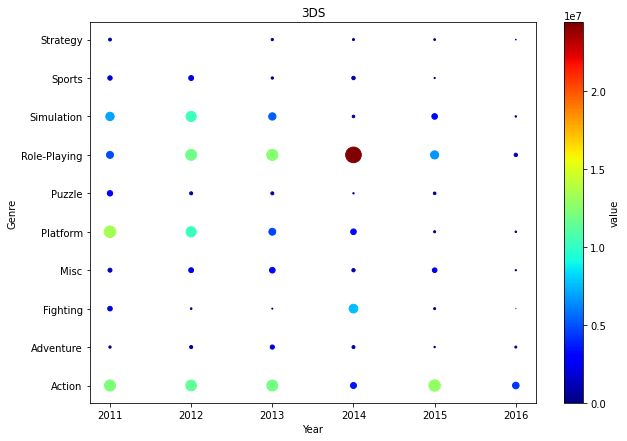

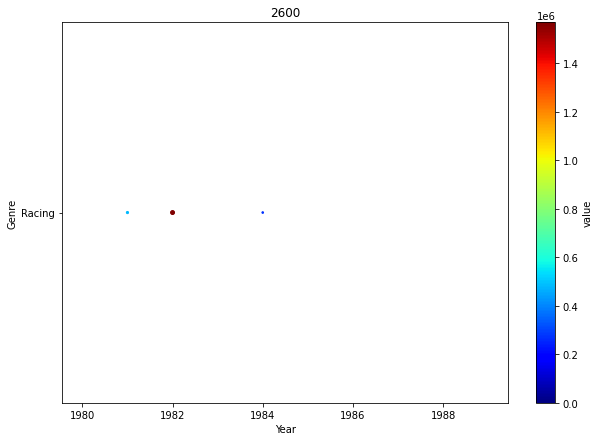

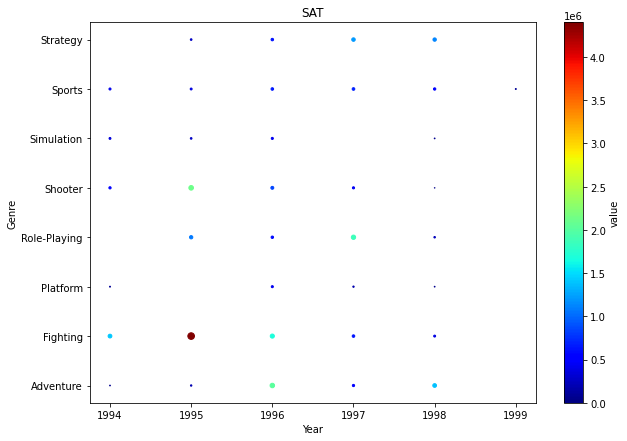

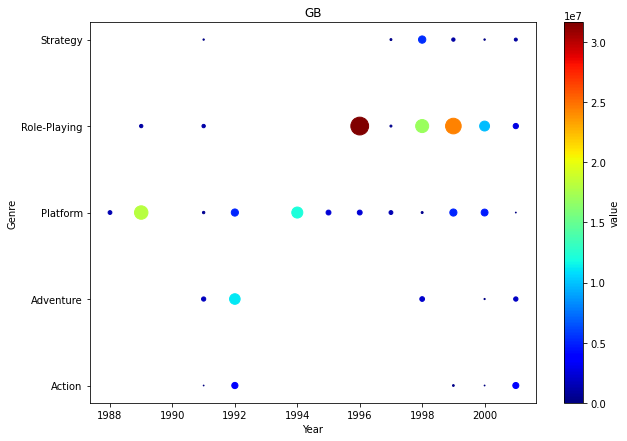

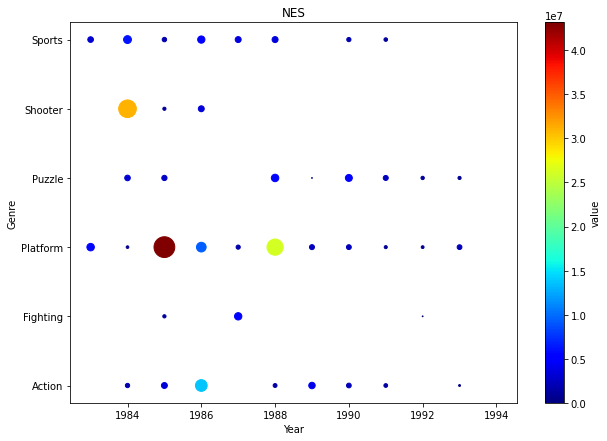

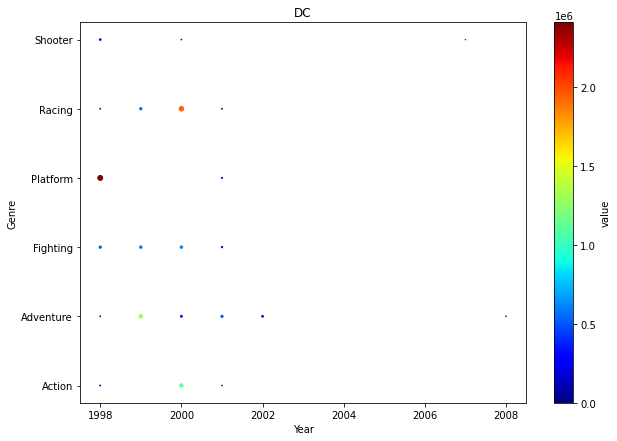

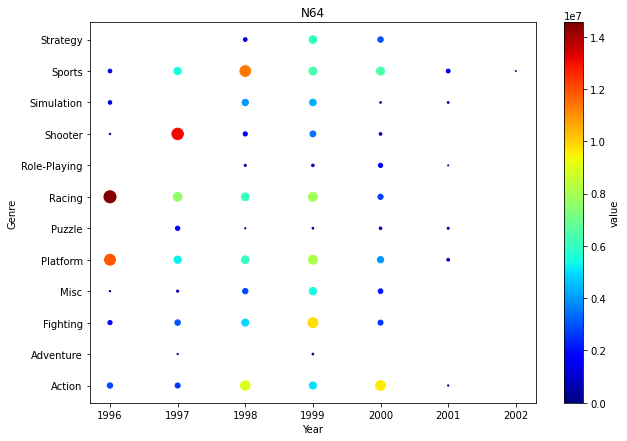

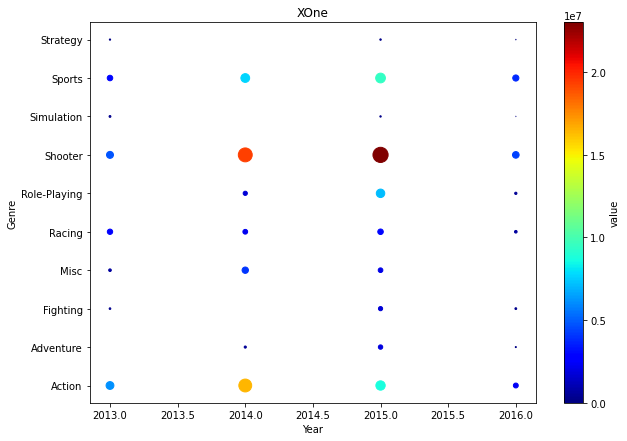

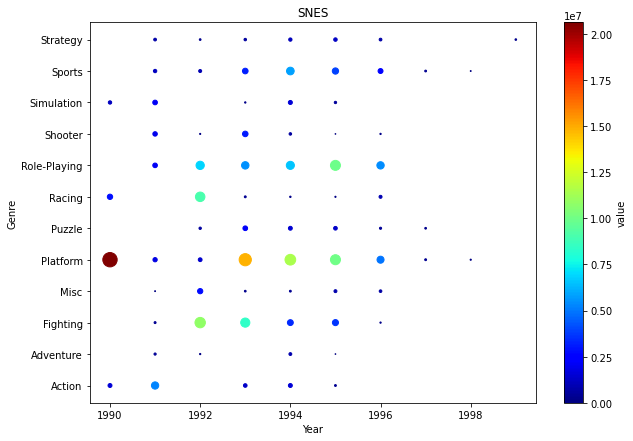

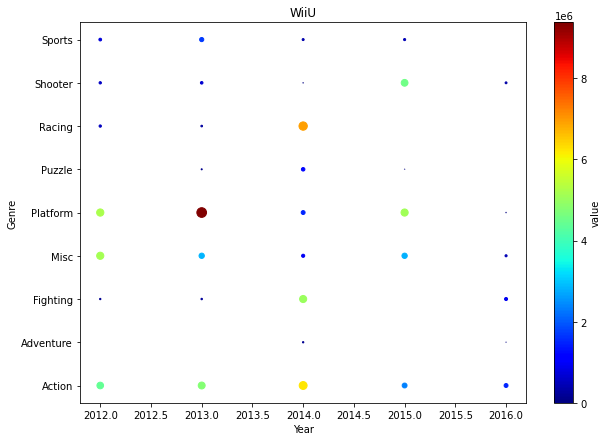

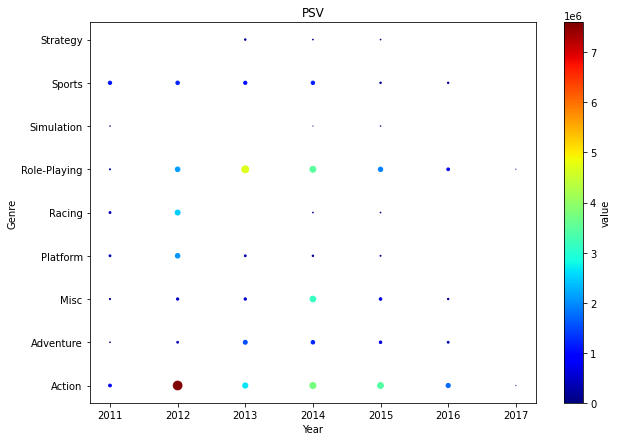

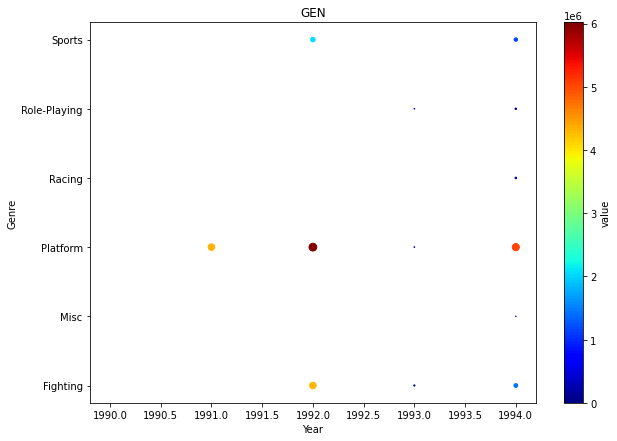

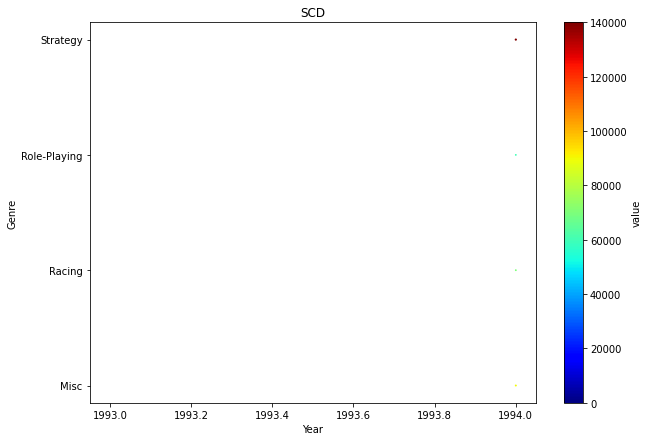

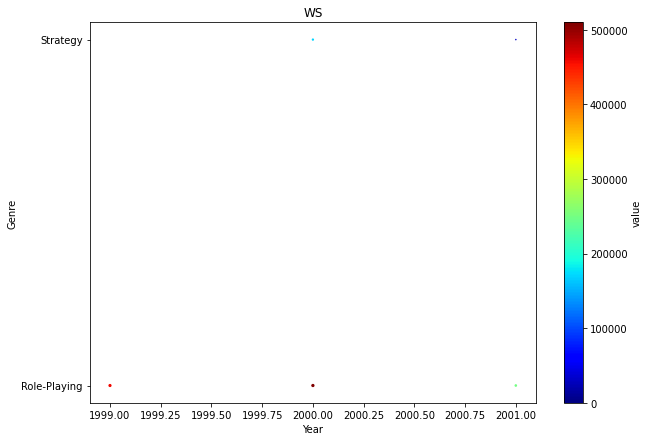

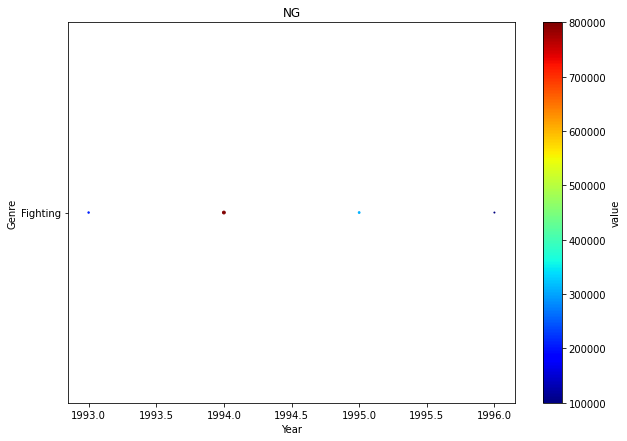

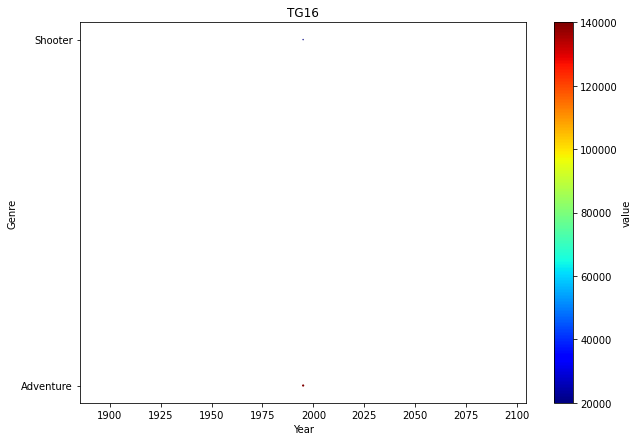

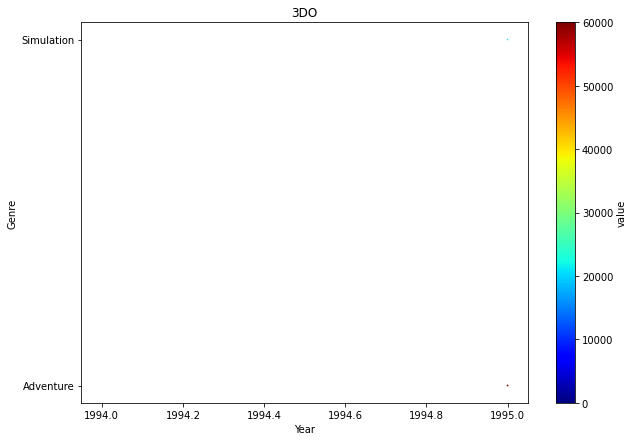

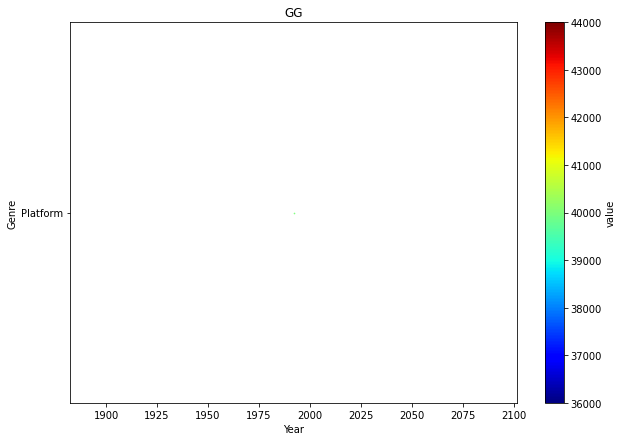

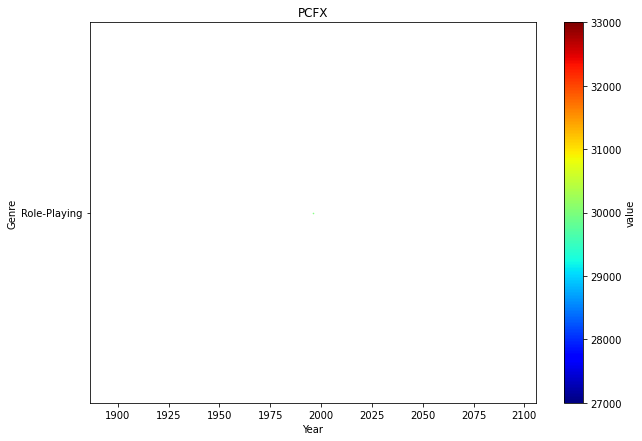

In [ ]:
for pf in df["Platform"].unique() :
  trand_year(df.query("Platform == @pf"), pf)

# 판매량이 높은 게임 분석

In [234]:
# 판매량 10위의 게임들 목록
# 10개 게임 모두 전 지역에서 판매됨
top10 = df.groupby("Name").sum()["Sales"].sort_values(ascending=False).head(10).index

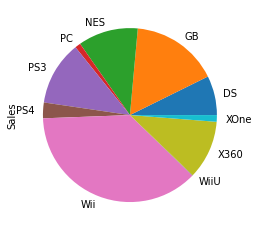

In [258]:
# 게임 플랫폼
df.query("Name in @top10").groupby("Platform").Sales.sum().plot(kind="pie")

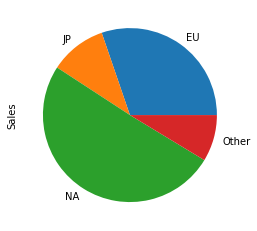

In [255]:
# 나라 별 판매량
df.query("Name in @top10").groupby("Location").Sales.sum().plot(kind='pie')